<a href="https://colab.research.google.com/github/GAHANAPS7/AI-Based-Prediction-of-Groundwater-Level-Dynamics-for-Sustainable-Management/blob/main/AIWaterManagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install streamlit
!npm install -g localtunnel
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

df = pd.read_csv('/content/Dynamic_2017_2_0.csv')
df.head(21)
df.tail(10)


⠙⠹⠸⠼⠴⠦⠧⠇⠏
changed 22 packages in 1s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
679,680,LAKSHADWEEP,Androth,166.50,0.00,30.20,0.00,196.70,131.90,64.80,0.00,41.90,41.90,41.90,22.90,64.66
680,681,LAKSHADWEEP,Chetlat,35.80,0.00,6.50,0.00,42.30,28.20,14.10,0.00,8.70,8.70,8.70,5.40,61.70
681,682,LAKSHADWEEP,Kadmat,107.30,0.00,19.50,0.00,126.80,84.50,42.30,0.00,19.80,19.80,19.80,22.60,46.81
682,683,LAKSHADWEEP,Kalpeni,78.50,0.00,14.20,0.00,92.70,61.80,30.90,0.00,16.40,16.40,16.40,14.50,53.07
683,684,LAKSHADWEEP,Kiltan,56.10,0.00,10.20,0.00,66.30,43.80,22.50,0.00,15.10,15.10,15.10,7.40,67.11
684,685,LAKSHADWEEP,Kavaratti,124.90,0.00,22.70,0.00,147.60,97.30,50.30,0.00,41.80,41.80,41.80,8.50,83.10
685,686,LAKSHADWEEP,Minicoy,157.60,0.00,27.30,0.00,184.90,121.20,63.70,0.00,38.60,38.60,38.60,25.01,60.60
686,687,Puducherry,Puducherry,7035.00,2738.37,1775.58,3671.63,15220.58,1522.06,13698.52,10338.00,3632.50,13970.50,3652.00,0.00,101.99
687,688,Puducherry,Karaikal,1973.73,4080.47,209.22,880.62,7144.04,714.40,6429.64,616.65,387.67,1004.32,404.52,5408.47,15.62
688,689,Puducherry,Mahe,245.45,0.00,23.11,0.00,268.56,26.85,241.71,0.00,166.00,166.00,176.34,65.37,68.68


In [3]:
print(df.describe())

            S.no.  Recharge from rainfall During Monsoon Season  \
count  689.000000                                    684.000000   
mean   345.000000                                  36828.240585   
std    199.041453                                  33811.769678   
min      1.000000                                      0.000000   
25%    173.000000                                  14708.017500   
50%    345.000000                                  29500.850000   
75%    517.000000                                  48974.910000   
max    689.000000                                 331775.320000   

       Recharge from other sources During Monsoon Season  \
count                                         684.000000   
mean                                         9720.652792   
std                                         15570.185575   
min                                             0.000000   
25%                                           833.565000   
50%                                 

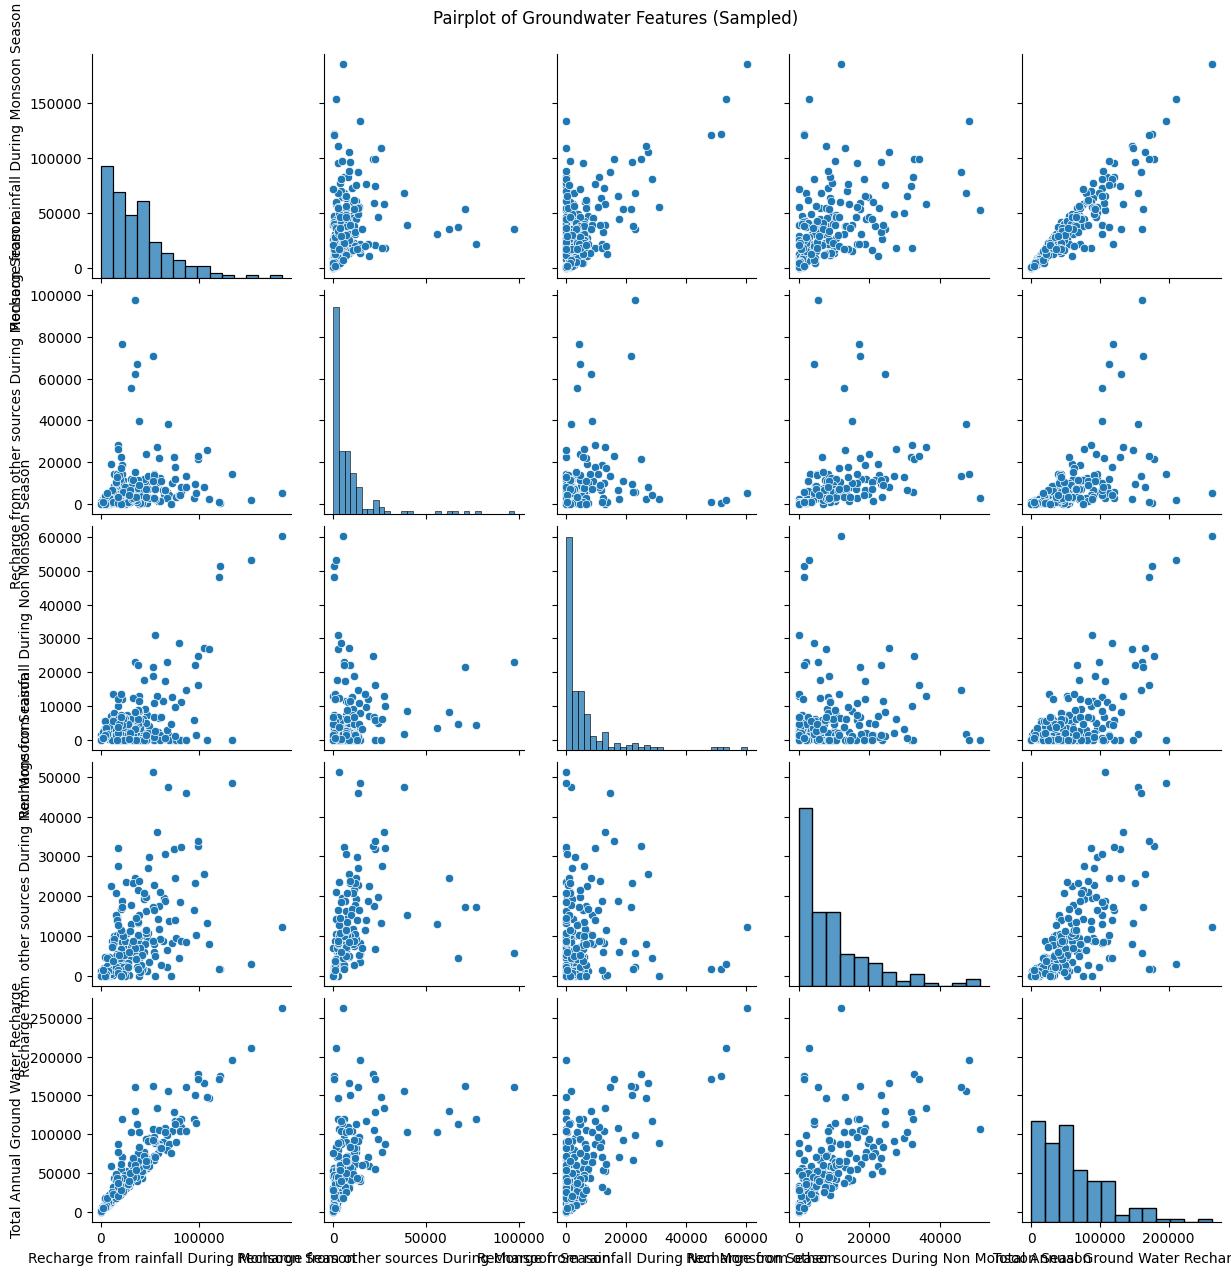

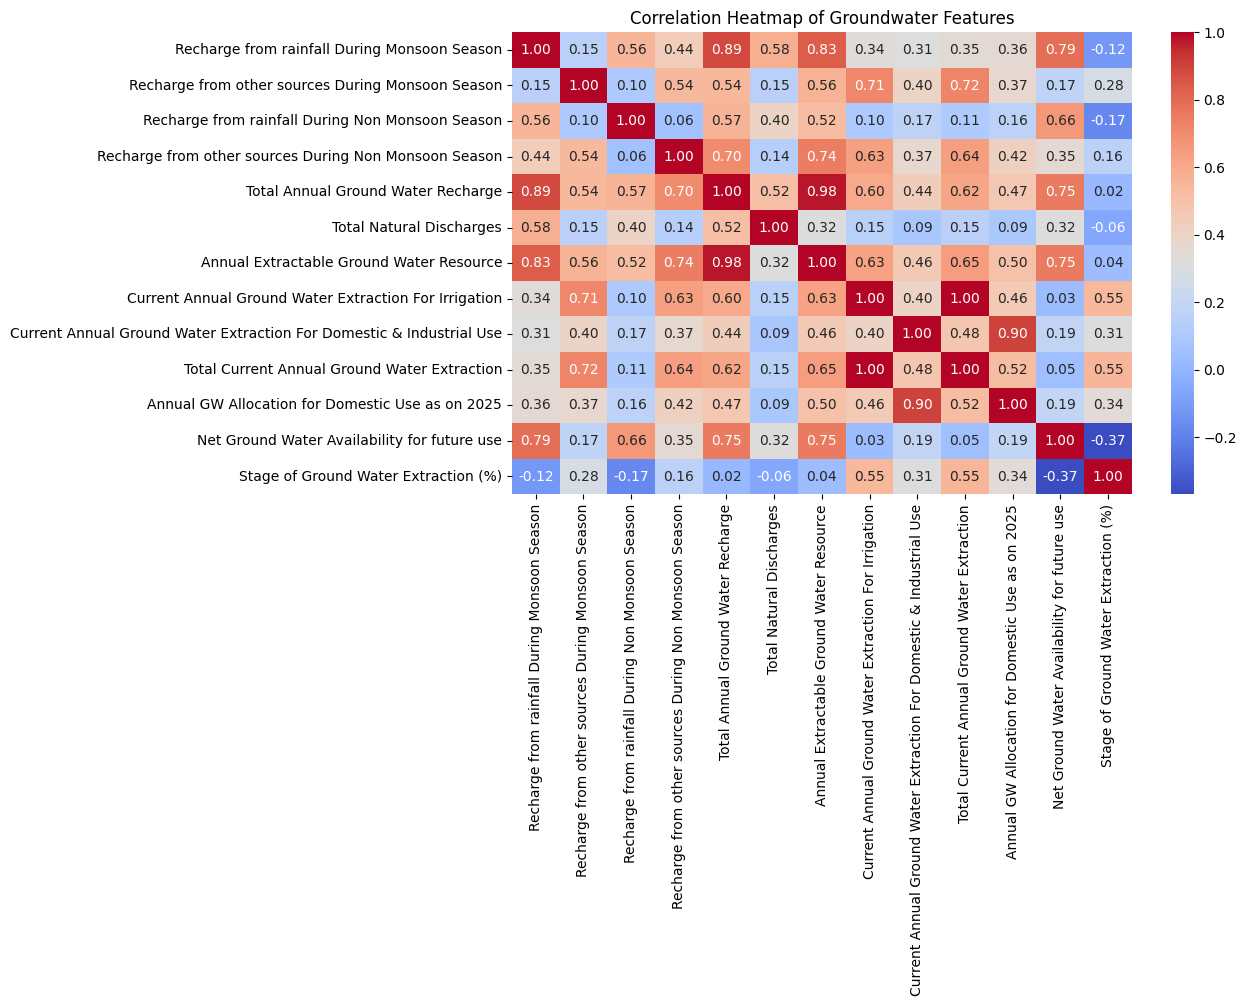

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already loaded the dataset as df
# Example: df = pd.read_csv("groundwater.csv")

# Select only numeric columns (ignoring S.no., State, District)
numeric_cols = [
    'Recharge from rainfall During Monsoon Season',
    'Recharge from other sources During Monsoon Season',
    'Recharge from rainfall During Non Monsoon Season',
    'Recharge from other sources During Non Monsoon Season',
    'Total Annual Ground Water Recharge',
    'Total Natural Discharges',
    'Annual Extractable Ground Water Resource',
    'Current Annual Ground Water Extraction For Irrigation',
    'Current Annual Ground Water Extraction For Domestic & Industrial Use',
    'Total Current Annual Ground Water Extraction',
    'Annual GW Allocation for Domestic Use as on 2025',
    'Net Ground Water Availability for future use',
    'Stage of Ground Water Extraction (%)'
]

# ---- Pairplot (small sample for readability) ----
sns.pairplot(df.sample(200), vars=numeric_cols[:5])  # using first 5 features for clarity
plt.suptitle("Pairplot of Groundwater Features (Sampled)", y=1.02)
plt.show()
print()
print()
print()
print()

# ---- Correlation Heatmap ----
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Groundwater Features")
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Select numeric features only, drop the target column
X = df.drop(columns=['Stage of Ground Water Extraction (%)']).select_dtypes(include='number')

# Define mask (target and all features must be non-null)
mask = df['Stage of Ground Water Extraction (%)'].notna() & X.notna().all(axis=1)

# Apply mask
X = X[mask]
y = (df.loc[mask, 'Stage of Ground Water Extraction (%)'].astype(float) > 100).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Fit logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X_train_s, y_train)

# Evaluate accuracy
print("Test accuracy:", model.score(X_test_s, y_test))


Test accuracy: 0.9562043795620438


Accuracy: 0.948905109489051

Classification Report:
               precision    recall  f1-score   support

         Bad       0.95      0.88      0.91        42
        Good       0.95      0.98      0.96        95

    accuracy                           0.95       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.95      0.95      0.95       137



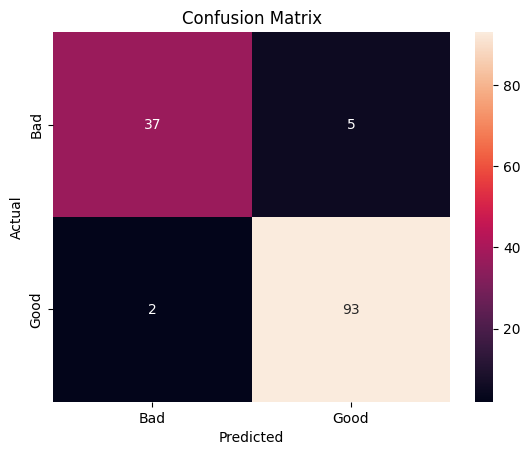

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
df = df[df['Stage of Ground Water Extraction (%)'].notnull()]
df['target'] = np.where(df['Stage of Ground Water Extraction (%)'] < 70, 1, 0)  # 1: Good, 0: Bad

# Select features (skipping non-numeric/categorical/ID columns)
feature_cols = [
    'Recharge from rainfall During Monsoon Season',
    'Recharge from other sources During Monsoon Season',
    'Recharge from rainfall During Non Monsoon Season',
    'Recharge from other sources During Non Monsoon Season',
    'Total Annual Ground Water Recharge',
    'Total Natural Discharges',
    'Annual Extractable Ground Water Resource',
    'Current Annual Ground Water Extraction For Irrigation',
    'Current Annual Ground Water Extraction For Domestic & Industrial Use',
    'Total Current Annual Ground Water Extraction',
    'Annual GW Allocation for Domestic Use as on 2025',
    'Net Ground Water Availability for future use',
]
X = df[feature_cols].fillna(0)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model (Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred, target_names=['Bad','Good']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Bad','Good'], yticklabels=['Bad','Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming your feature arrays are X_train and y_train
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model to disk
joblib.dump(model, 'groundwater_rf_model.pkl')


['groundwater_rf_model.pkl']

In [8]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

feature_cols = [
  'Recharge from rainfall During Monsoon Season',
  'Recharge from other sources During Monsoon Season',
  'Recharge from rainfall During Non Monsoon Season',
  'Recharge from other sources During Non Monsoon Season',
  'Total Annual Ground Water Recharge',
  'Total Natural Discharges',
  'Annual Extractable Ground Water Resource',
  'Current Annual Ground Water Extraction For Irrigation',
  'Current Annual Ground Water Extraction For Domestic & Industrial Use',
  'Total Current Annual Ground Water Extraction',
  'Annual GW Allocation for Domestic Use as on 2025',
  'Net Ground Water Availability for future use'
]

# Load your machine learning model
model = joblib.load('groundwater_rf_model.pkl')

st.title("Groundwater Resource Classification")
inputs = []
for col in feature_cols:
    val = st.number_input(col, value=0.0)
    inputs.append(val)

if st.button("Predict"):
    X_input = np.array(inputs).reshape(1, -1)
    result = model.predict(X_input)
    status = "Good" if result == 1 else "Bad"
    st.success(f"Prediction: {status}")


Writing app.py


In [9]:
# Install pyngrok
!pip install pyngrok

from pyngrok import ngrok
import threading
import time
import subprocess

# Set your ngrok authtoken (sign up at https://dashboard.ngrok.com/get-started/your-authtoken)
# Replace 'YOUR_NGROK_AUTH_TOKEN' with your actual token string.
ngrok.set_auth_token("32cypQhgKjNYeMes9RbpFMyGn3A_7JCsL3z2W6nfePPcvsEBm")

# Function to run Streamlit app in background
def run_streamlit():
    subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"])

# Start Streamlit in a separate thread
threading.Thread(target=run_streamlit).start()

# Wait for the server to start
time.sleep(5)

# Open an ngrok tunnel for port 8501
public_url = ngrok.connect(8501)
print("Streamlit app URL:", public_url)


Streamlit app URL: NgrokTunnel: "https://d27da440bda1.ngrok-free.app" -> "http://localhost:8501"
